In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random_seed = 42
np.random.seed(random_seed)

In [5]:
data_path = Path.cwd()
data_dir = data_path/'data/raw/train/train'
class_names = sorted(os.listdir(data_dir))
class_distribution = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

C:\Users\Clemens\AppData\Local\Temp\ipykernel_34252\1917140633.py:10: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, max(sizes) * 1.15)


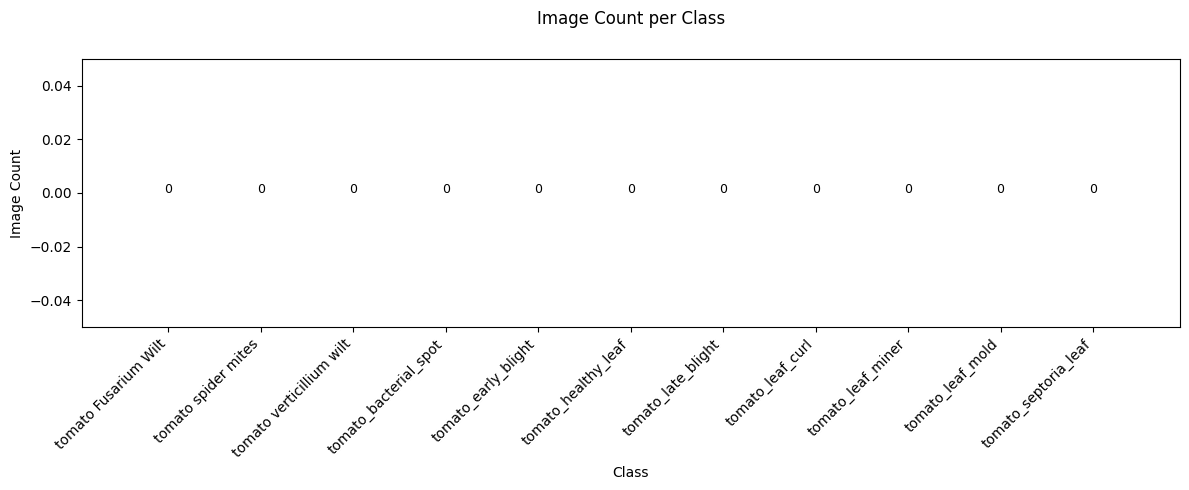

In [6]:
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

colors = ['green' if label == 'tomato_healthy_leaf' else 'tab:blue' for label in labels]

plt.figure(figsize=(12, 5))
plt.bar(labels, sizes, color=colors)

# Add space above bars
plt.ylim(0, max(sizes) * 1.15)

# Show numbers above bars
for i, v in enumerate(sizes):
    plt.text(i, v + max(sizes)*0.02, str(v), ha='center', fontsize=9)

plt.title("Image Count per Class", pad=25)
plt.xlabel("Class")
plt.ylabel("Image Count")

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25, top=0.90)

plt.tight_layout()
plt.show()

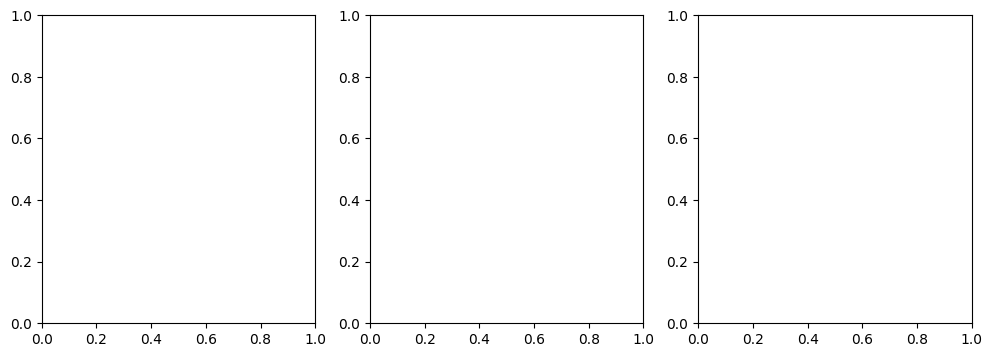

In [7]:
# show the first three images from a class
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sample_class = class_names[0]
class_dir = os.path.join(data_dir, sample_class)
image_files = os.listdir(class_dir)[:3]
for j, image_file in enumerate(image_files):
    image_path = os.path.join(class_dir, image_file)
    image = plt.imread(image_path)
    axes[j].imshow(image)
    axes[j].axis('off')
    axes[j].set_title(f"{sample_class} - Image {j+1}", fontsize=14)

ValueError: 'a' cannot be empty unless no samples are taken

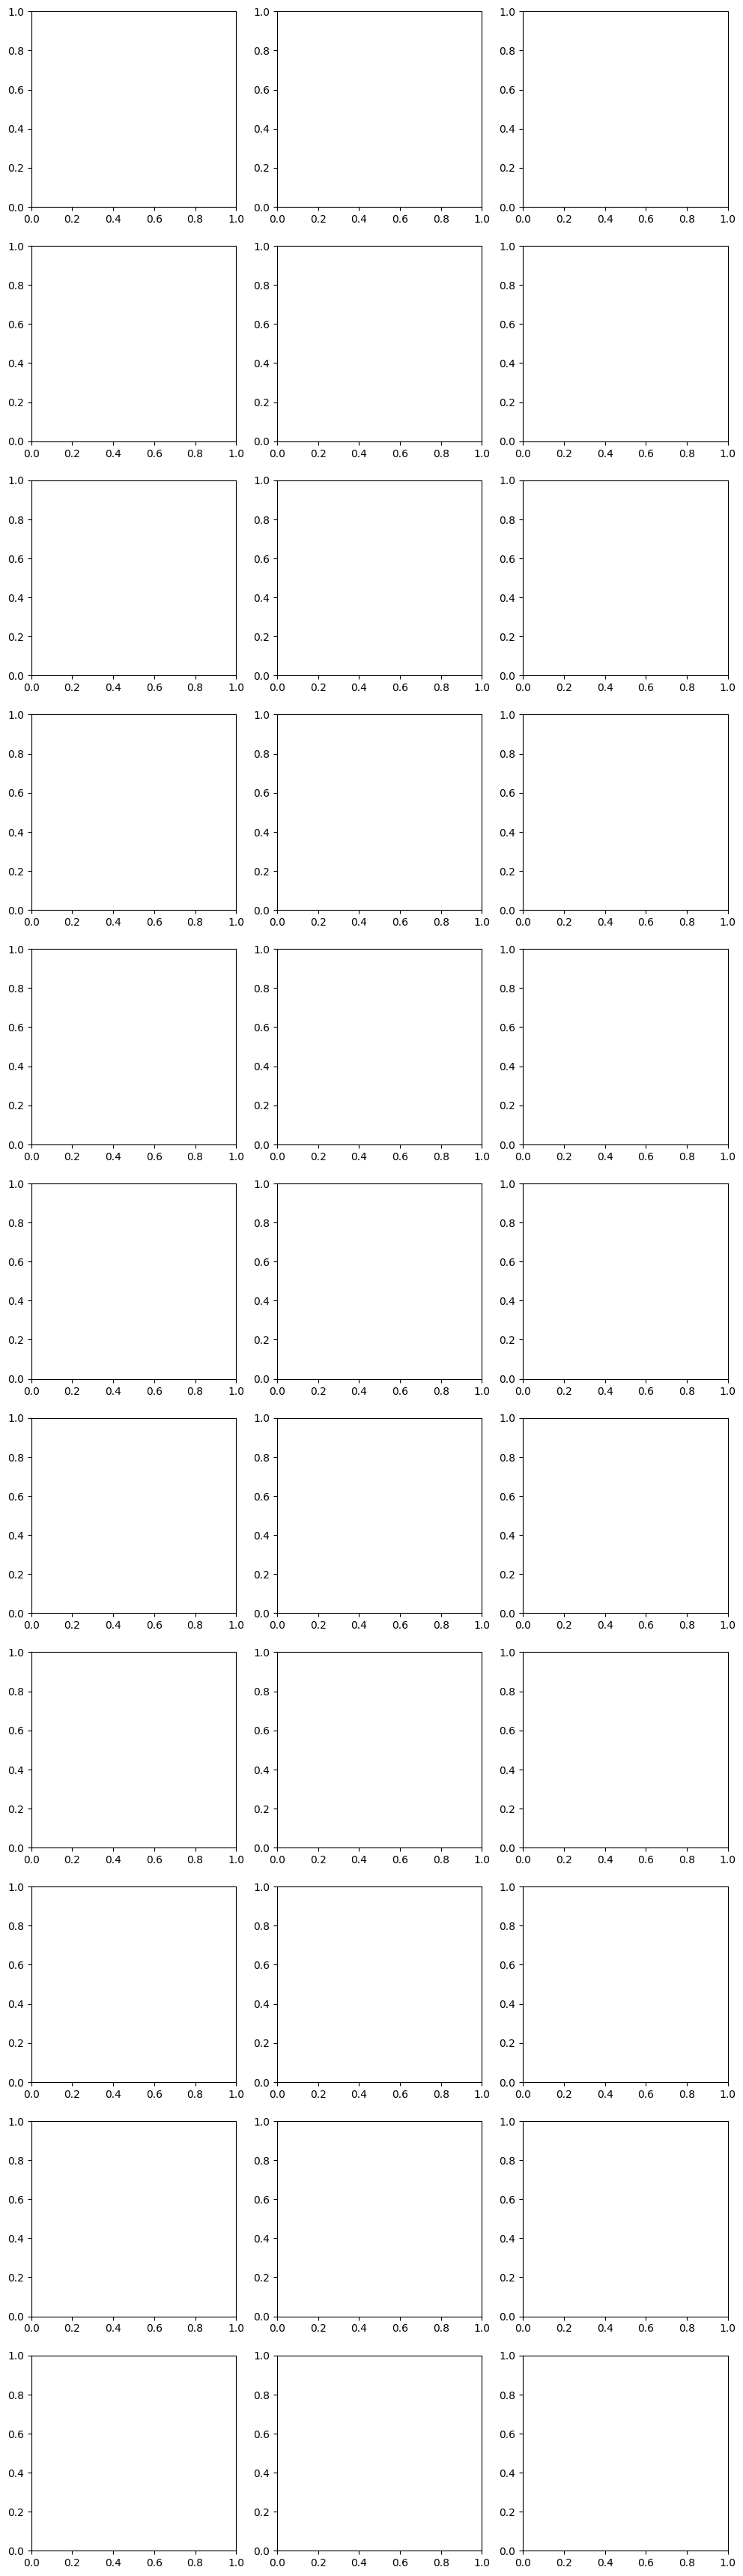

In [8]:
# show three random sample images from each class
fig, axes = plt.subplots(len(class_names), 3, figsize=(12, 4 * len(class_names)))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    image_files = np.random.choice(os.listdir(class_dir), 3, replace=False)

    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(class_name, fontsize=16)

plt.tight_layout()
plt.show()